# Time Series Mini Project

## Furniture Sales Forecast:

Every business owner’s objective is to estimate the future trends – in terms of sales, profits, gains etc. To do this analysis, the owner first has to segregate the data by category and analyze each entity separately. For each entity, a forecast can be estimated based on the past sales of that entity. The idea behind this is to find out the popularity of a certain product and how its sales can impact the business.

Every product category is unique and cater to different customer base. So the analysis cannot be generalized that one trend is applicable to all products. A thorough insight into the past performance will reveal a lot of components that will enable the business to identify the trends.


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.statespace.tools import diff
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_squared_error,r2_score
from statsmodels.tsa.api import ExponentialSmoothing
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
df = pd.read_excel('DS3_C6_S4_TimeSeries_Sales_Data_Project.xls',index_col='Order Date',parse_dates=True)

In [3]:
df.isnull().sum()

Row ID           0
Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [4]:
fdf = df[df['Category']=='Furniture'].copy()

In [5]:
fdf

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2014-06-09,6,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
2014-06-09,11,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-19,9963,CA-2015-168088,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,Texas,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2016-12-05,9965,CA-2016-146374,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,Delaware,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2015-09-06,9981,US-2015-151435,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,Louisiana,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548


In [6]:
fdf.groupby("Order Date").sum("Sales")

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Order Date,,,,,,
2014-01-06,7475,42420,2573.8200,9,0.00,746.4078
2014-01-07,7661,77340,76.7280,3,0.60,-53.7096
2014-01-10,867,22153,51.9400,1,0.00,21.2954
2014-01-11,717,19901,9.9400,2,0.00,3.0814
2014-01-13,7918,123573,879.9390,9,0.15,91.2798
...,...,...,...,...,...,...
2017-12-24,21344,267135,1393.4940,14,0.50,222.9092
2017-12-25,14187,138310,832.4540,14,0.80,-7.0763
2017-12-28,30000,452384,551.2568,17,2.02,-49.6680


In [7]:
def decomp_plot(dft,freq):
    decomposition=seasonal_decompose(np.asarray(dft), freq=freq)
    d_trend=decomposition.trend
    d_seasonal=decomposition.seasonal
    d_residual=decomposition.resid

    fig,ax = plt.subplots(4,1,figsize=(20,12))

    plt.subplot(411)
    plt.plot(dft,label='Sales - as it is')
    plt.legend(loc='best')

    plt.subplot(412)
    plt.plot(d_trend,label='Trend')
    plt.legend(loc='best')

    plt.subplot(413)
    plt.plot(d_seasonal,label='Seasonal')
    plt.legend(loc='best')

    plt.subplot(414)
    plt.plot(d_residual,label='Residual')
    plt.legend(loc='best')

    plt.tight_layout()

In [8]:
dft = fdf['Sales']

## Decomposition of Data

In [9]:
dft = dft.resample('W').sum().copy()

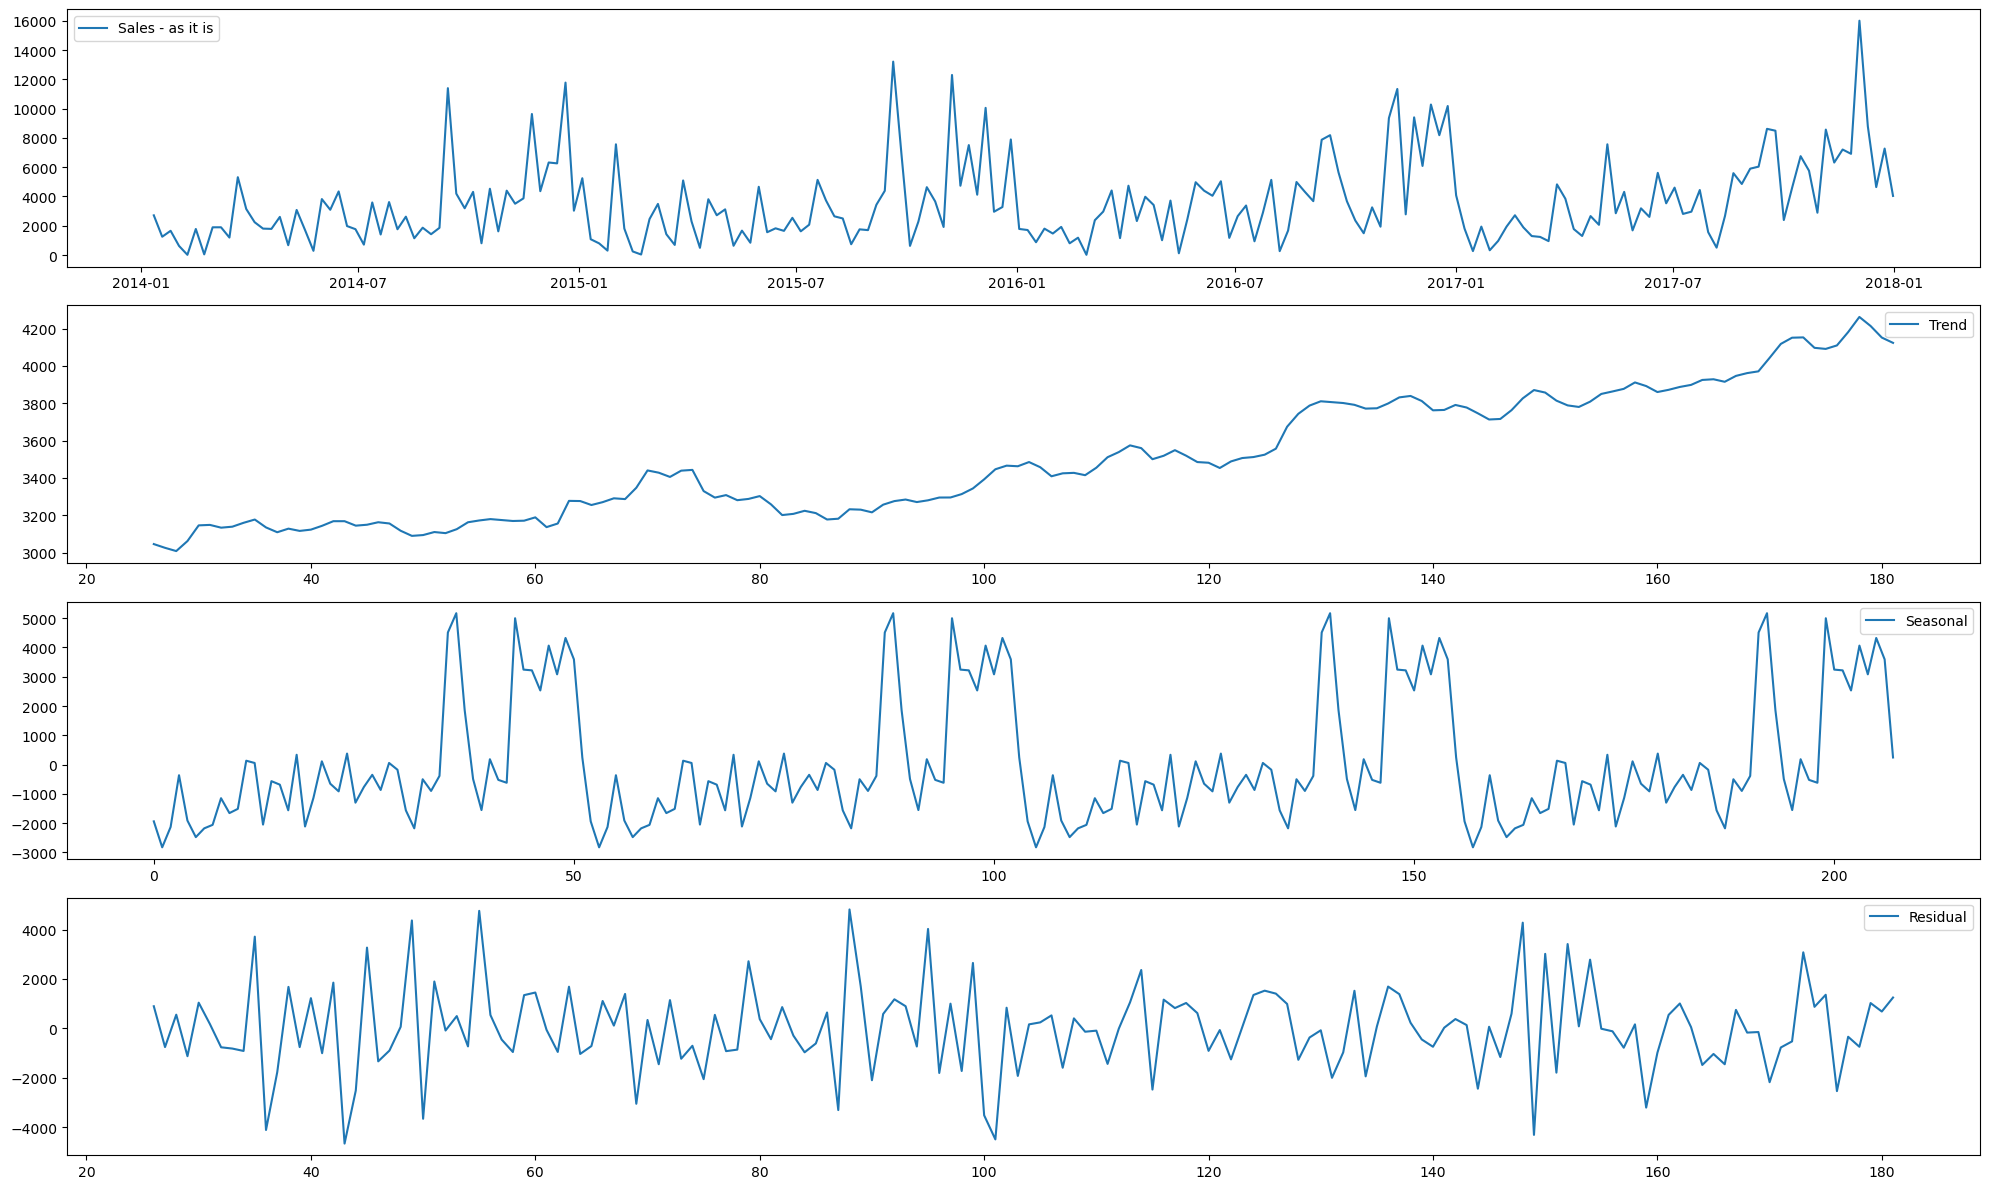

In [10]:
decomp_plot(dft,52)

In [11]:
dft

Order Date
2014-01-12     2712.4280
2014-01-19     1250.4730
2014-01-26     1655.9580
2014-02-02      623.6660
2014-02-09       14.5600
                 ...    
2017-12-03    16008.1720
2017-12-10     8794.4040
2017-12-17     4639.8190
2017-12-24     7274.0430
2017-12-31     4037.5648
Freq: W-SUN, Name: Sales, Length: 208, dtype: float64

## Data is seasonal and has an upward trend

In [12]:
dft2 = dft.resample('M').sum().copy()

In [13]:
len(dft2)

48

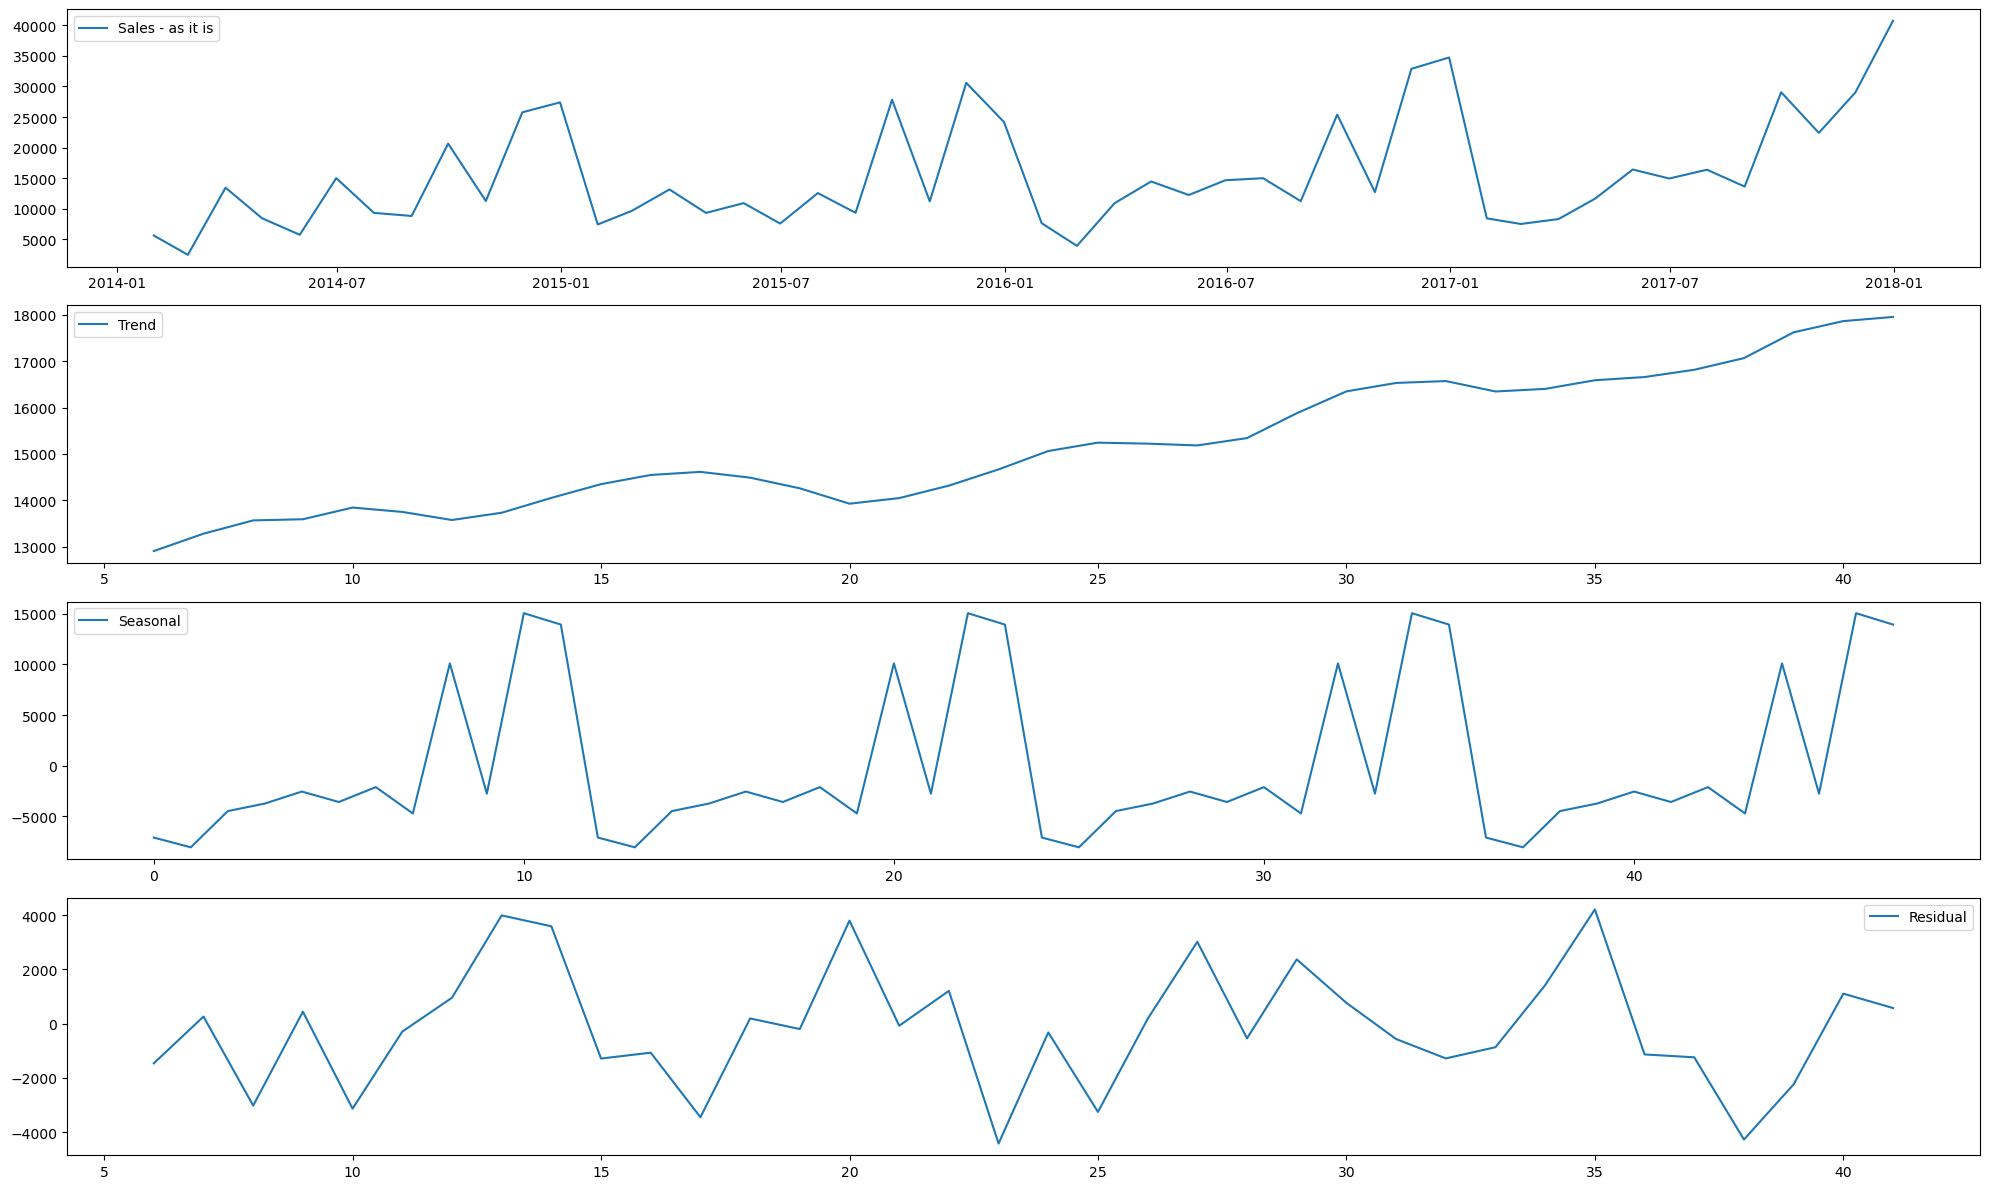

In [14]:
decomp_plot(dft2,12)

In [15]:
dft2

Order Date
2014-01-31     5618.8590
2014-02-28     2463.3240
2014-03-31    13448.4680
2014-04-30     8439.3210
2014-05-31     5745.4820
2014-06-30    15004.4346
2014-07-31     9323.3230
2014-08-31     8818.0745
2014-09-30    20647.8528
2014-10-31    11264.8450
2014-11-30    25772.9027
2014-12-31    27394.5025
2015-01-31     7427.1556
2015-02-28     9653.4400
2015-03-31    13155.8430
2015-04-30     9318.9975
2015-05-31    10920.7755
2015-06-30     7576.1930
2015-07-31    12560.4640
2015-08-31     9337.7032
2015-09-30    27825.8540
2015-10-31    11204.9565
2015-11-30    30587.2995
2015-12-31    24186.2592
2016-01-31     7637.5030
2016-02-29     3925.5510
2016-03-31    10915.0050
2016-04-30    14457.1230
2016-05-31    12245.4380
2016-06-30    14657.5450
2016-07-31    14996.9970
2016-08-31    11243.6483
2016-09-30    25394.3996
2016-10-31    12714.9173
2016-11-30    32886.7358
2016-12-31    34738.0450
2017-01-31     8423.4450
2017-02-28     7510.2124
2017-03-31     8312.8480
2017-04-30    

## Smoothing the Data

C:\Users\samue\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


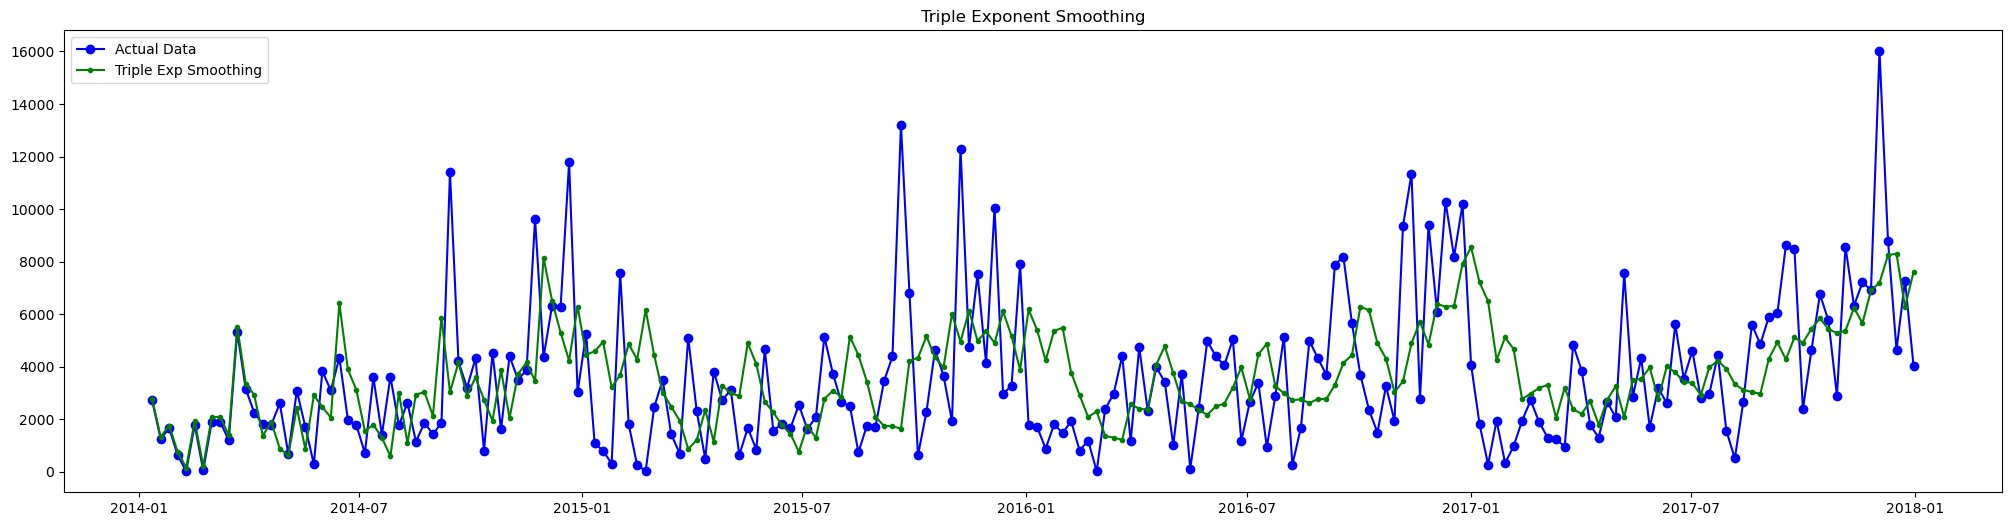

In [16]:
model = ExponentialSmoothing(dft,trend='add',seasonal='add',seasonal_periods=12).fit()
data = model.fittedvalues

fig,ax = plt.subplots(1,1,figsize=(25,6))
plt.plot(dft, marker='o',color='blue',label='Actual Data')
plt.plot(model.fittedvalues,marker='.',color='green',label='Triple Exp Smoothing')
plt.legend()
plt.title('Triple Exponent Smoothing')
plt.show()

## Checking Stationarity

In [17]:
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    '''
    output:-> 
    1) test statistic, 
    2) p-value, 
    3) number of lags, 
    4) total observations
    
    dfoutput = pd.Series(result[0:4],index=['tstat','pvalue','lags','obs'])
    pvalue = dfoutput['pvalue']
    '''
    
    if(pvalue>0.05):
        msg = 'p-value={}. Data is not stationary'.format(pvalue)
    else:
        msg='p-value={}. \nHence, Data is stationary'.format(pvalue)
        
    print(msg)

In [18]:
checkStationarity(data)

p-value=0.006870705492844467. 
Hence, Data is stationary


## Since the data has seasonality as well as the data is stational we can use SARIMA/SARIMAX model for our forecast

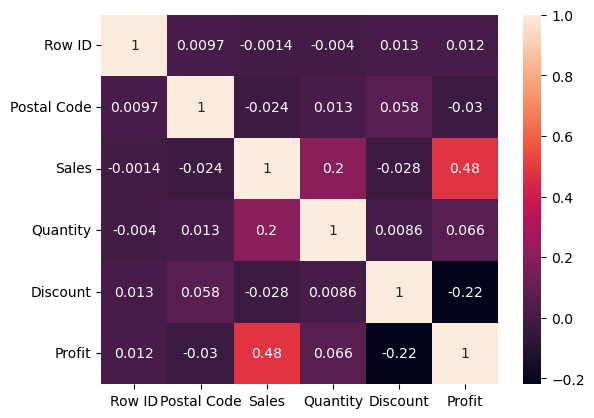

In [19]:
sns.heatmap(df.corr(), annot=True)
plt.show()

## No other variable is having a stronger cooleration with our target column hence we can't use any of these as exogenous variable

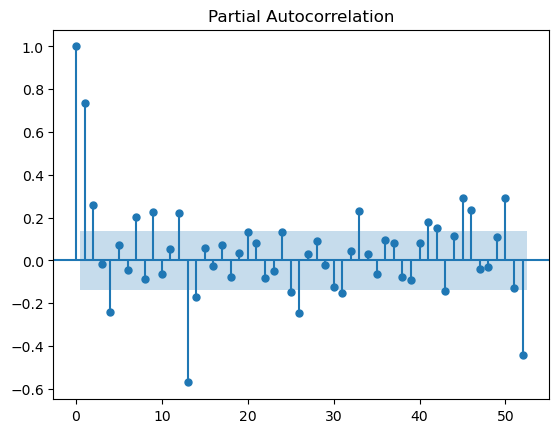

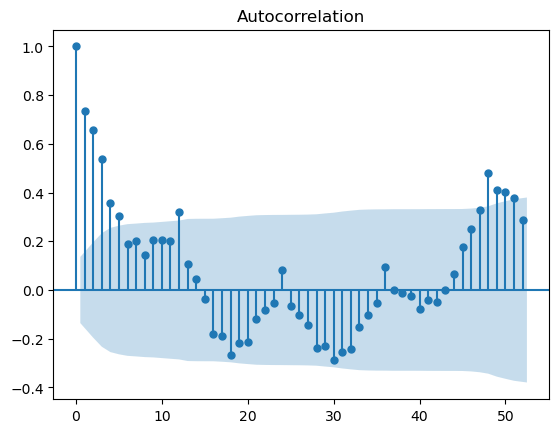

In [20]:
plot_pacf(data,lags=52);
plot_acf(data,lags=52);

In [21]:
p=2
q=5
d=0

In [22]:
data

Order Date
2014-01-12    2753.344872
2014-01-19    1324.867898
2014-01-26    1757.743744
2014-02-02     747.861476
2014-02-09     157.089180
                 ...     
2017-12-03    7192.071819
2017-12-10    8244.601821
2017-12-17    8299.783972
2017-12-24    6263.740663
2017-12-31    7599.979190
Freq: W-SUN, Length: 208, dtype: float64

In [38]:
# split the data into train and test
length = int(0.8 * len(data))
train = (data.iloc[:length])
test = pd.Series(data.iloc[length:])
print("train = {}, test = {}".format(len(train), len(test)))

train = 166, test = 42


In [39]:
test.index

DatetimeIndex(['2017-03-19', '2017-03-26', '2017-04-02', '2017-04-09',
               '2017-04-16', '2017-04-23', '2017-04-30', '2017-05-07',
               '2017-05-14', '2017-05-21', '2017-05-28', '2017-06-04',
               '2017-06-11', '2017-06-18', '2017-06-25', '2017-07-02',
               '2017-07-09', '2017-07-16', '2017-07-23', '2017-07-30',
               '2017-08-06', '2017-08-13', '2017-08-20', '2017-08-27',
               '2017-09-03', '2017-09-10', '2017-09-17', '2017-09-24',
               '2017-10-01', '2017-10-08', '2017-10-15', '2017-10-22',
               '2017-10-29', '2017-11-05', '2017-11-12', '2017-11-19',
               '2017-11-26', '2017-12-03', '2017-12-10', '2017-12-17',
               '2017-12-24', '2017-12-31'],
              dtype='datetime64[ns]', name='Order Date', freq='W-SUN')

## SARIMA MODEL

In [25]:
def sarima(p,d,q,lag,df):
    model = SARIMAX(data,order=(p,d,q),seasonal_order=(p,d,q,lag)).fit()
    return model

In [26]:
sarima_model = sarima(2,0,5,52,train)

C:\Users\samue\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [27]:
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  208
Model:             SARIMAX(2, 0, 5)x(2, 0, 5, 52)   Log Likelihood               -1750.516
Date:                            Tue, 05 Jul 2022   AIC                           3531.033
Time:                                    15:33:37   BIC                           3581.096
Sample:                                01-12-2014   HQIC                          3551.276
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0245      0.078      0.315      0.752      -0.128       0.176
ar.L2          0.9660      0.074     13.058      0.000       0.821       1.111
ma.L1          0.5629      0.108      5.219      0.000       0.351       0.774
ma.L2         -0.4186      0.110     -3.790      0.000      -0.635      -0.202
ma.L3          0.1648      0.096      1.724      0.085      -0.023       0.352
ma.L4         -0.2245      0.096     -2.327      0.020      -0.414      -0.035
ma.L5         -0.4085      0.082     -5.005      0.000      -0.568      -0.249
ar.S.L52       0.1658   8023.912   2.07e-05      1.000   -1.57e+04    1.57e+04
ar.S.L104      0.3971   6779.425   5.86e-05      1.000   -1.33e+04    1.33e+04
ma.S.L52      -0.1845   8028.688   -2.3e-05      1.000   -1.57e+04    1.57e+04
ma.S.L104     -0.2793   6933.174  -4.03e-05      1.000   -1.36e+04    1.36e+04
ma.S.L156      0.0336   1050.516    3.2e-05      1.000   -2058.940    2059.007
ma.S.L208     -0.0204    405.410  -5.03e-05      1.000    -794.610     794.569
ma.S.L260      0.0237     51.332      0.000      1.000    -100.585     100.632
sigma2      1.179e+06     79.504   1.48e+04      0.000    1.18e+06    1.18e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                12.30
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.95e+20. Standard errors may be unstable.
"""

In [42]:
test.index

DatetimeIndex(['2017-03-19', '2017-03-26', '2017-04-02', '2017-04-09',
               '2017-04-16', '2017-04-23', '2017-04-30', '2017-05-07',
               '2017-05-14', '2017-05-21', '2017-05-28', '2017-06-04',
               '2017-06-11', '2017-06-18', '2017-06-25', '2017-07-02',
               '2017-07-09', '2017-07-16', '2017-07-23', '2017-07-30',
               '2017-08-06', '2017-08-13', '2017-08-20', '2017-08-27',
               '2017-09-03', '2017-09-10', '2017-09-17', '2017-09-24',
               '2017-10-01', '2017-10-08', '2017-10-15', '2017-10-22',
               '2017-10-29', '2017-11-05', '2017-11-12', '2017-11-19',
               '2017-11-26', '2017-12-03', '2017-12-10', '2017-12-17',
               '2017-12-24', '2017-12-31'],
              dtype='datetime64[ns]', name='Order Date', freq='W-SUN')

In [28]:
results2 = pd.DataFrame()
results2['predictions'] = sarima_model.predict(start='2017-03-19',end='2017-12-31')
results2['actual'] = test
results2['error'] = results2['actual']-results2['predictions']
results2

,predictions,actual,error
Order Date,,,
2017-03-19,3391.355108,3196.488451,-194.866657
2017-03-26,3237.866924,2372.039151,-865.827773
2017-04-02,2164.122139,2201.348681,37.226542
2017-04-09,2887.891651,2682.431052,-205.460599
2017-04-16,2488.992369,1790.486003,-698.506366
2017-04-23,2662.747597,2739.753523,77.005926
2017-04-30,2599.417522,3256.328296,656.910775
2017-05-07,3055.807231,2074.421239,-981.385992
2017-05-14,2885.164473,3488.181087,603.016615


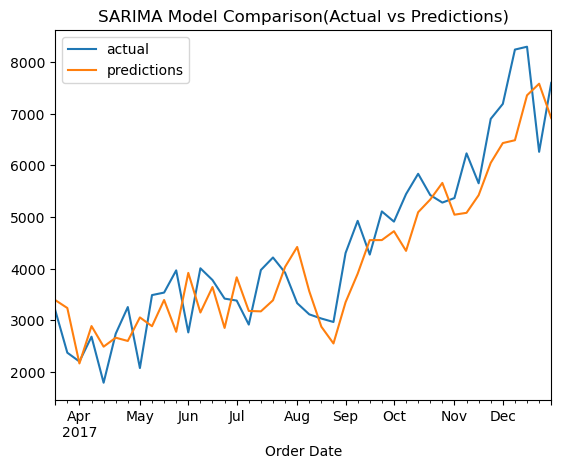

In [29]:
results2[['actual','predictions']].plot()
plt.title('SARIMA Model Comparison(Actual vs Predictions)')
plt.show()

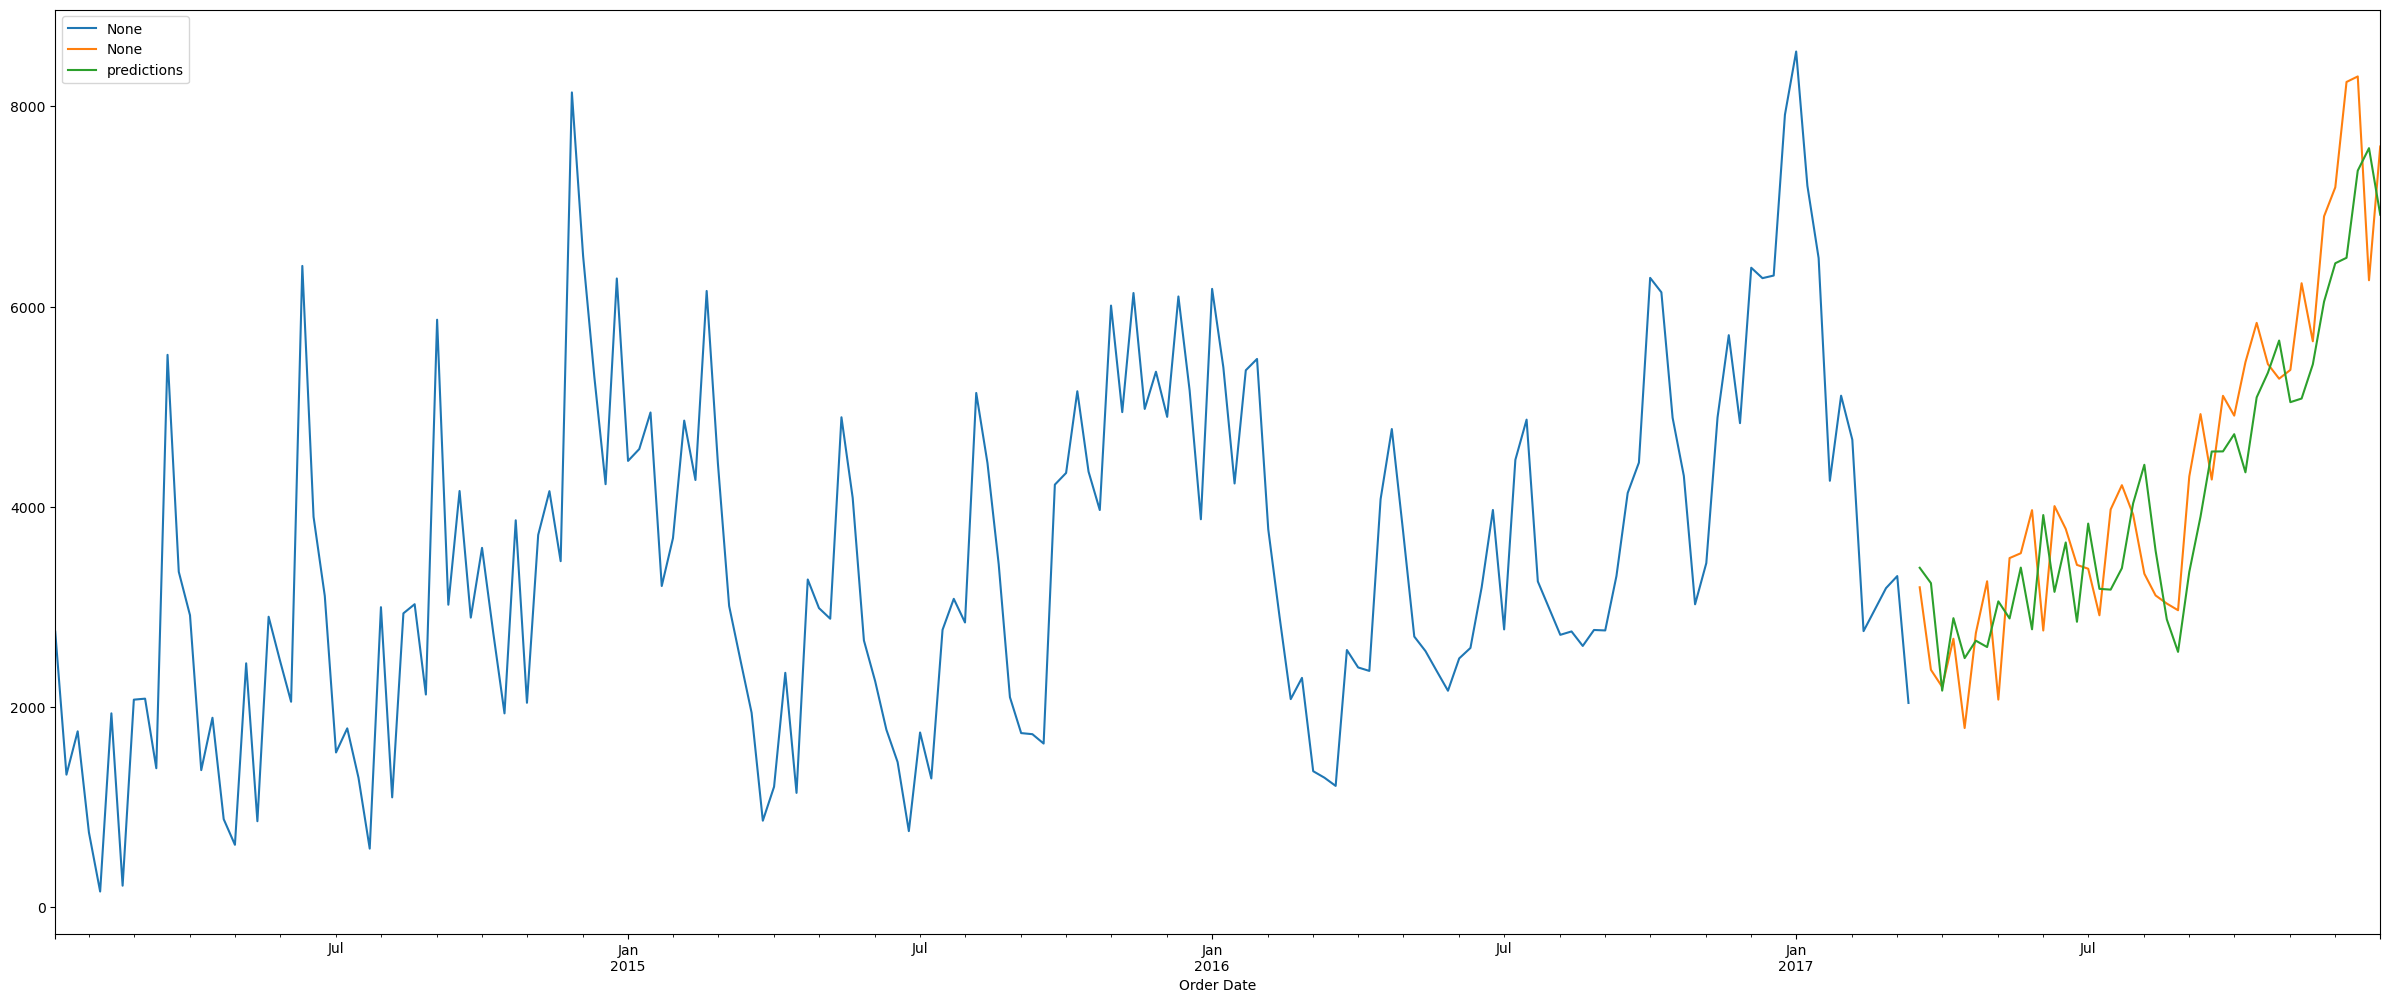

In [30]:
train.plot(figsize=(30,12))
test.plot(figsize=(30,12))
results2['predictions'].plot(figsize=(30,12))
plt.legend()
plt.show()

In [31]:
model = 'SARIMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')'
mse = mean_squared_error(results2['actual'], results2['predictions'])
aic = sarima_model.aic
bic = sarima_model.bic
print(model + "\n\tMSE = {}\n\tRMSE = {}\n\tAIC = {}\n\tBIC = {}".format(mse,np.sqrt(mse),aic,bic))

SARIMA Model. Order=(2,0,5)
	MSE = 556725.1802451138
	RMSE = 746.1401880646249
	AIC = 3531.032668156883
	BIC = 3581.0957393524027


In [32]:
r2_score(results2['actual'],results2['predictions'])

0.797726221806802

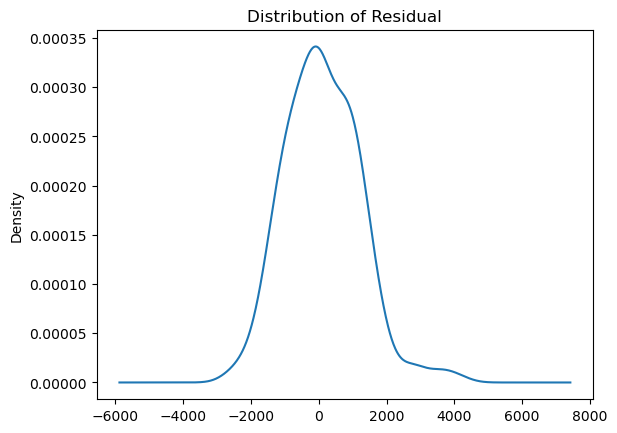

In [33]:
sarima_model.resid.plot(kind="kde")
plt.title("Distribution of Residual")
plt.show()

## Forecasting

In [43]:
len(test)

42

In [44]:
forecast_data=sarima_model.forecast(52)

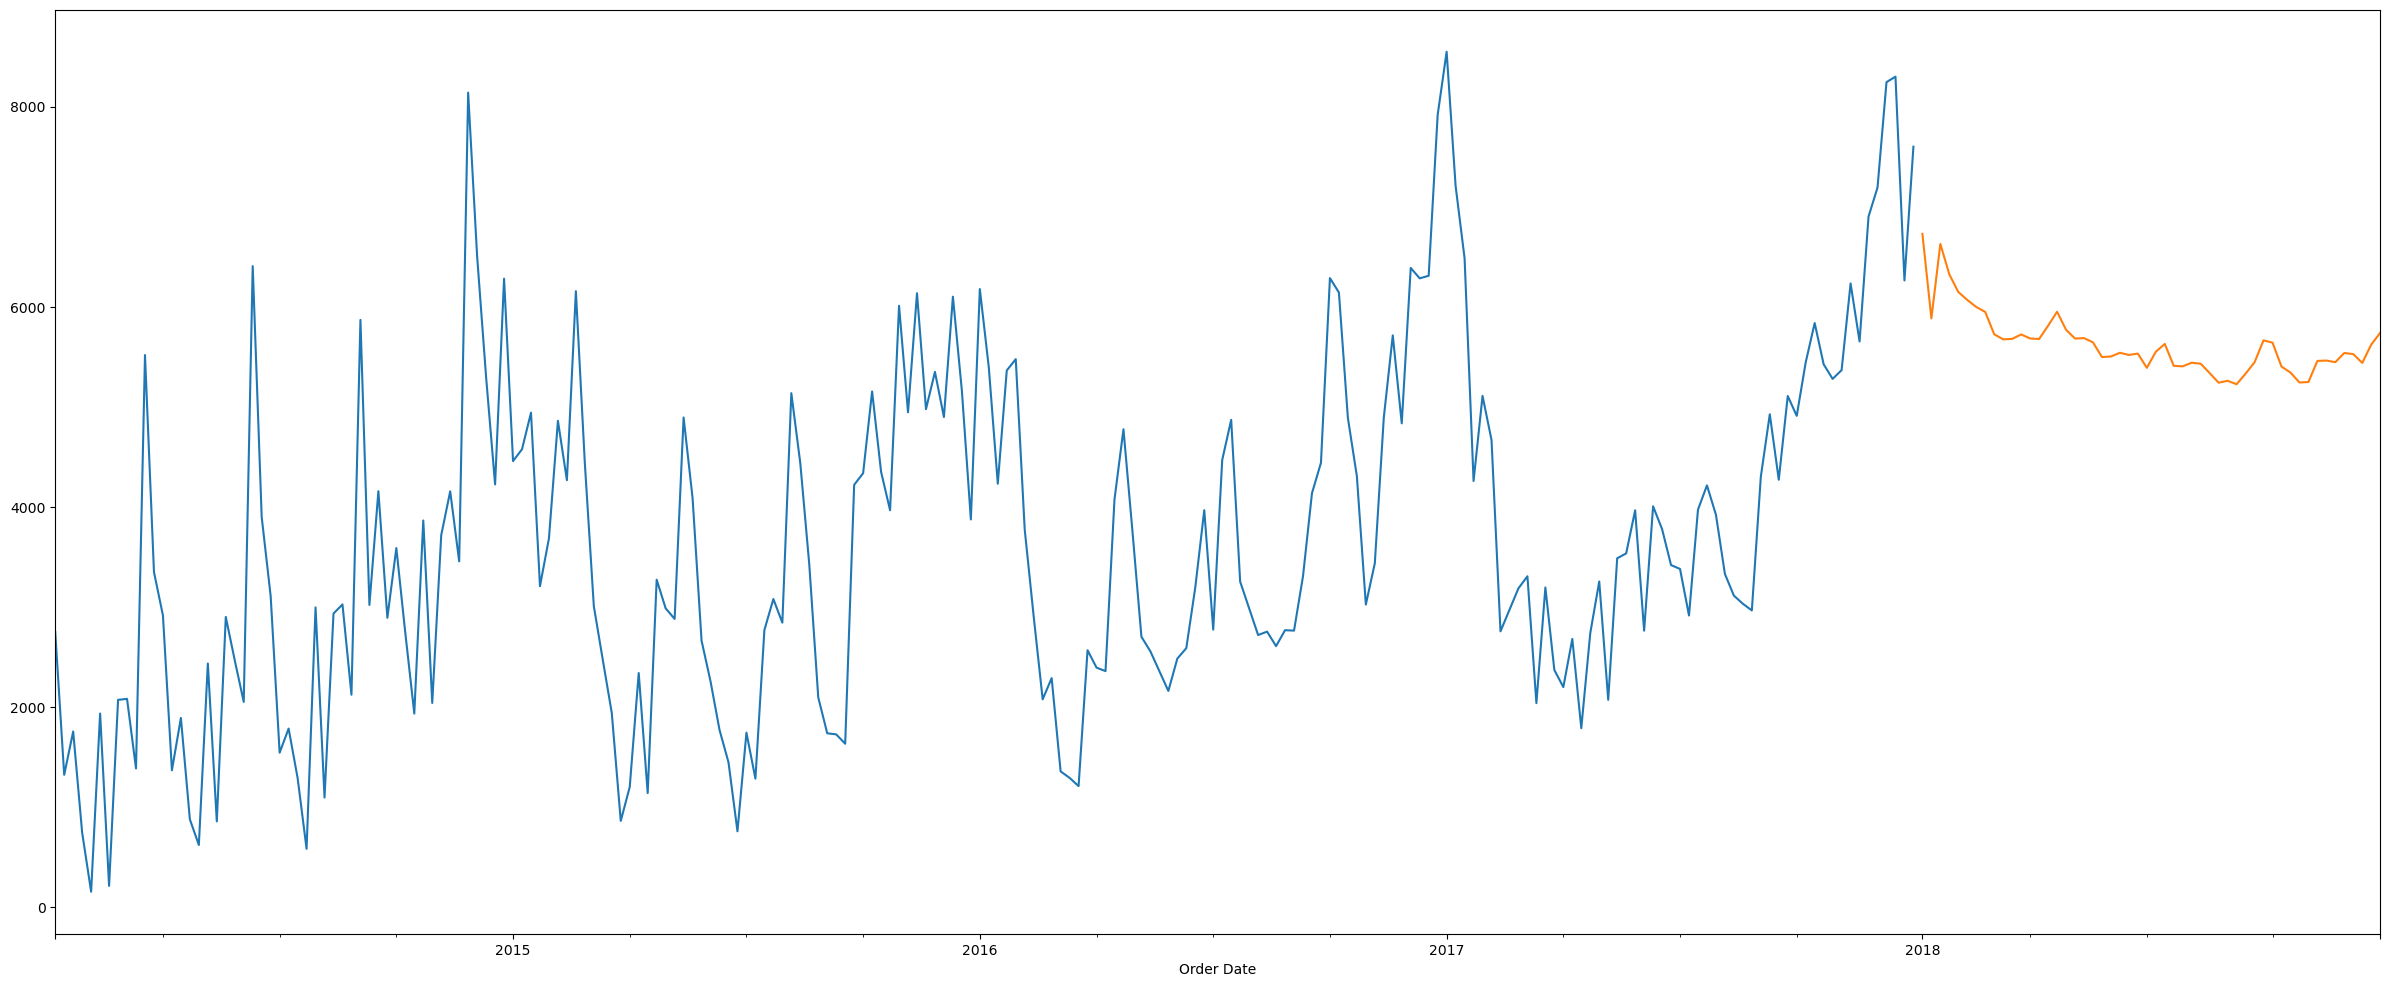

In [45]:
#train.plot(figsize=(30,12))
##test.plot(figsize=(30,12))
data.plot(figsize=(30,12))
forecast_data.plot(figsize=(30,12))
plt.show()